<a href="https://colab.research.google.com/github/JavisBizzareAdventure/Opt3FinalProject/blob/main/ProyectoFinalOpt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri May 28 12:02:32 2021

@author: Javier Zamora
"""

'\nCreated on Fri May 28 12:02:32 2021\n\n@author: Javier Zamora\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pneumonia Filters

In this proyect we were tasked to classify between normal, bacterian and viral patients of pneumonia for the dataset "Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification", found over at https://data.mendeley.com/datasets/rscbjbr9sj/2 , with a CNN. Objective is to get over 92% accuracy, showing confusion matrix and F1 scores to demonstrate it's working properly.

I'm using only the train folder from this dataset to train my CNN, as uploading all the dataset to Drive is time expensive, I'm using colab to make this project hence the Drive upload. Also I divided "PNEUMONIA" folder as it had bacterian and viral infections, this to give them different classes.

## Pre-processing

We called the Directories to wich the dataset was saved, we print an image of each set to make sure we are usig the correct direcotry.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas
import cv2

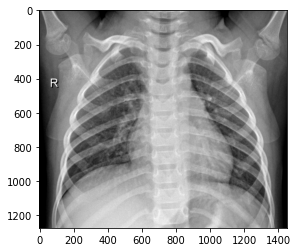

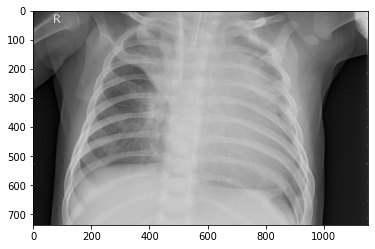

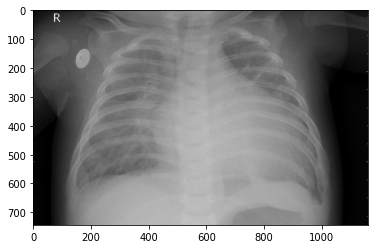

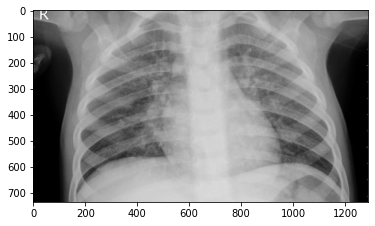

In [ ]:
TRAINDIR = "/content/drive/My Drive/Colab Notebooks/train"
TESTDIR = "/content/drive/My Drive/Colab Notebooks/test"
CATEGORIES = ["NORMAL","BACTERIA","VIRUS"]

path = os.path.join(TRAINDIR, CATEGORIES[0]) # path to a normal pneumonia patient
for img in os.listdir(path):
    img_array_N = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array_N, cmap="gray")
    plt.show()
    break
path = os.path.join(TRAINDIR, CATEGORIES[1]) # path to a bacterian pneumonia patient
for img in os.listdir(path):
    img_array_B = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array_B, cmap="gray")
    plt.show()
    break
path = os.path.join(TRAINDIR, CATEGORIES[2]) # path to a virial pneumonia patient
for img in os.listdir(path):
    img_array_V = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array_V, cmap="gray")
    plt.show()
    break
path = os.path.join(TESTDIR, CATEGORIES[2]) # path to a virial pneumonia patient from test batch
for img in os.listdir(path):
    img_array_Vt = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array_Vt, cmap="gray")
    plt.show()
    break    

We tried some new sizes for the images to see how far can we take the compression without loosing important image details and also to normalize each photo.

Text(0.5, 1.0, 'Virus')

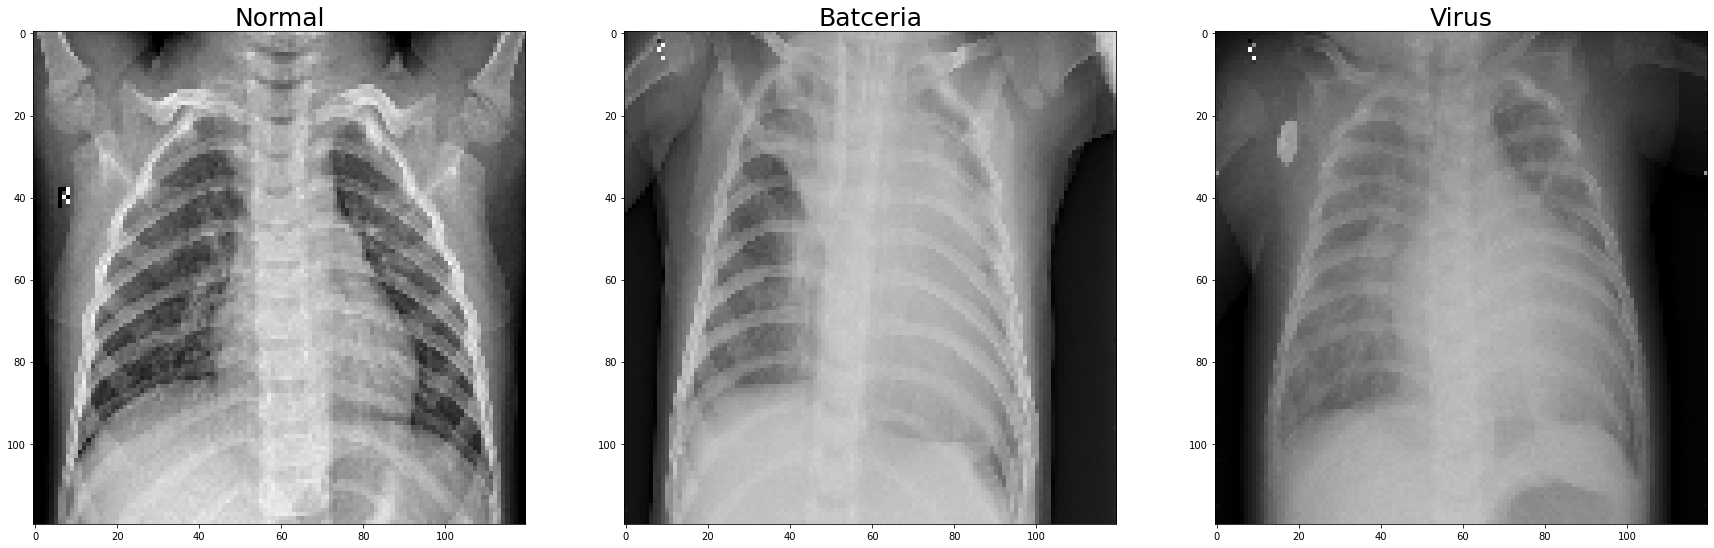

In [ ]:
IMG_SIZE= 120
new_array_N = cv2.resize(img_array_N, (IMG_SIZE , IMG_SIZE))
new_array_B = cv2.resize(img_array_B, (IMG_SIZE , IMG_SIZE))
new_array_V = cv2.resize(img_array_V, (IMG_SIZE , IMG_SIZE))

f,(ax0 , ax1, ax2) = plt.subplots(1, 3, figsize=(30, 30))

ax0.imshow(new_array_N , cmap='gray')
ax0.set_title('Normal', fontsize=25)

ax1.imshow(new_array_B , cmap='gray')
ax1.set_title('Batceria', fontsize=25)

ax2.imshow(new_array_V , cmap='gray')
ax2.set_title('Virus', fontsize=25)


We've chosen a size of a 120x120 pixels, wich is enough to distinguish the details without having massive images to deal with, this will be helpfull to reduce the computational charge needed to train the algorithm.

Now, in a variable called new_array we save the images that will be kept in a new dataset called trainig_data in grascale and resized, I'm not sure if it's completely necessary to turn the into grayscale as they are already, at least visually, maybe they have some RGB components we may not notice, or maybe not, gray-scaling is always a good practice so I'll keep it.

In [ ]:
training_data = []

In [ ]:
testing_data=[]

In [ ]:
def create_trainign_data():
    for category in CATEGORIES:
        path = os.path.join(TRAINDIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE , IMG_SIZE))
                training_data.append([new_array , class_num])
            except Exception as e: #In case of any broken images, maybe none of them are, but I'm not checking either
                pass
            
create_trainign_data()    

In [ ]:

def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(TESTDIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE , IMG_SIZE))
                testing_data.append([new_array , class_num])
            except Exception as e: 
                pass
            
create_testing_data()  

In [ ]:
print(len(training_data))
print(len(testing_data))


8137
624


Now we shuffle the training_data.

In [ ]:
import random

random.shuffle(training_data)
random.shuffle(testing_data)

Here I demonstrate the rearranged data classes

In [ ]:
for sample in training_data[:10]:
    print(sample[1])

2
2
2
0
2
0
2
1
0
1


In [ ]:
for sample in testing_data[:10]:
    print(sample[1])

1
0
0
1
0
1
2
0
1
2


Let's now divide and save (pickle) the shuffled dataset.

In [ ]:
X_train = []
y_train = []

X_test = []
y_test = []

In [ ]:
for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

for features, label in training_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)


In [ ]:
import pickle

In [ ]:


pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()


pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

Note: I've pickled my shuffled compressed dataset so I won't need to rerun all the compression and grayscaling when I come back to work on this after reestarting the kernel, because it takes an eternity.

In [ ]:
pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)
y_train=np.array(y_train)

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

I've divided manually the dataset for pneumonia cases as in the same folder there are the Bacteria and Virus infections, by doing so, I've noticed the proportion is unbalanced, so is important to give weight to each class.
First I will use class_weight tool from sklearn to determine each weight.

In [ ]:
from sklearn.utils import class_weight
class_w=class_weight.compute_class_weight('balanced', np.unique(y_train), y_train[:])
print(class_w)
class_weights={0: class_w[0], 1: class_w[1], 2: class_w[2]}

[1.29280949 0.68715524 1.29665428]


Alright, let's get this convolution!

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import pickle

In [ ]:
pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

#Turning the imgs into a 0 to 1 scale
X_train = X_train/255.0
X_test = X_test/255.0

y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model = Sequential()

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=X_train.shape[1:]))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='RMSprop',
             metrics=['sparse_categorical_accuracy','accuracy'])

history = model.fit(X_train, y_train, batch_size=32, class_weight=class_weights, epochs=5, validation_split=0.33)

Epoch 1/5
110/110 [==============================] - 194s 2s/step - loss: 1.2786 - sparse_categorical_accuracy: 0.6288 - accuracy: 0.6288 - val_loss: 0.5311 - val_sparse_categorical_accuracy: 0.7805 - val_accuracy: 0.7805
Epoch 2/5
110/110 [==============================] - 192s 2s/step - loss: 0.5700 - sparse_categorical_accuracy: 0.7521 - accuracy: 0.7521 - val_loss: 0.5601 - val_sparse_categorical_accuracy: 0.7730 - val_accuracy: 0.7730
Epoch 3/5
110/110 [==============================] - 204s 2s/step - loss: 0.4660 - sparse_categorical_accuracy: 0.7832 - accuracy: 0.7832 - val_loss: 0.5674 - val_sparse_categorical_accuracy: 0.7829 - val_accuracy: 0.7829
Epoch 4/5
110/110 [==============================] - 194s 2s/step - loss: 0.4134 - sparse_categorical_accuracy: 0.8034 - accuracy: 0.8034 - val_loss: 0.5747 - val_sparse_categorical_accuracy: 0.7267 - val_accuracy: 0.7267
Epoch 5/5
110/110 [==============================] - 194s 2s/step - loss: 0.3535 - sparse_categorical_accuracy: 

Let's check now how would it behave if we only classify normal and pneumonia patients.

In [54]:
model.fit(X_train, y_trainB, batch_size=32, epochs=4, validation_split=0.3)

Epoch 1/4
115/115 [==============================] - 201s 2s/step - loss: 0.5702 - sparse_categorical_accuracy: 0.7351 - accuracy: 0.7351 - val_loss: 0.4065 - val_sparse_categorical_accuracy: 0.8210 - val_accuracy: 0.8210
Epoch 2/4
115/115 [==============================] - 201s 2s/step - loss: 0.4225 - sparse_categorical_accuracy: 0.8149 - accuracy: 0.8149 - val_loss: 0.4299 - val_sparse_categorical_accuracy: 0.8076 - val_accuracy: 0.8076
Epoch 3/4
115/115 [==============================] - 199s 2s/step - loss: 0.3879 - sparse_categorical_accuracy: 0.8312 - accuracy: 0.8312 - val_loss: 0.4025 - val_sparse_categorical_accuracy: 0.8248 - val_accuracy: 0.8248
Epoch 4/4
115/115 [==============================] - 200s 2s/step - loss: 0.3566 - sparse_categorical_accuracy: 0.8446 - accuracy: 0.8446 - val_loss: 0.4210 - val_sparse_categorical_accuracy: 0.8178 - val_accuracy: 0.8178
